### **Project: Investigate a Dataset - Medical Appointment No Shows**

<a id='intro'></a>
## **Introduction**

### Dataset Description 


> This dataset contains information from 100k plus medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

**The variables represented in this dataset are:**


> **01 - PatientId** : Identification of a patient , 
**02 - AppointmentID** : Identification of each appointment , **03 - Gender** :
Male or Female , **04 - AppointmentDay** : The day of the actual appointment , **05 - ScheduledDay** : The day someone called or registered the appointment , **06 - Age** : Patient's Age , **07 - Neighbourhood** : Were the appointments is taking place , **08 - Scholarship** : True of False(Bolsa Família Scholarship), **09 - Hipertension** : True of False , **10 - Diabetes** : True of False , **11 - Alcoholism** : True of False , **12 - Handcap** : True of False , **13 - SMS_received** : 1 or more messages sent to the patient , **14 - No-show** : True of False





## **Questions for Analysis**


*1) How much does age play in whether a person will show up for their appointment**


> ***Rational:*** Younger people tend to prioritize other things over their health. I will try to findout if younger people who are above the age of parental guidance have a higher percentage of missing appointments than other age groups

*2) How much does the time difference between the date appointment was made and the actual date of the appointment play in whether a person will show up for their appointment**


> ***Rational:*** According to the behavioural sciences, the time intervel between intention and behaviour plays a significant role in behaviour. I intend to find out whether the longer between the day the appointment was made and the actual appointment date makes any significant difference in the patient's showing up. 
I will also investigate if this time interval of no show is affected by the patient's age.





In [ ]:
# Imports of all nessecary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0
pd.__version__

'1.3.5'

###Data Wrangling:

> Loading in the dataset, check for cleanliness, get familiar with the dataset for analysis.

In [ ]:
# Loading in the dataset

df = pd.read_csv('https://raw.githubusercontent.com/idowu-james/Investigate-A-Dataset---Medical-Appointment-No-Shows/main/KaggleV2-May-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
# Getting the numbers of rows and columns in the dataset

df.shape

(110527, 14)

In [ ]:
# Understanding the general layout of the dataset, the datatypes of each variable and seeing if there are any missing values in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
# Checking if there are any duplicate entries
df.duplicated().sum()

0

In [ ]:
# Getting the statistical Overview of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


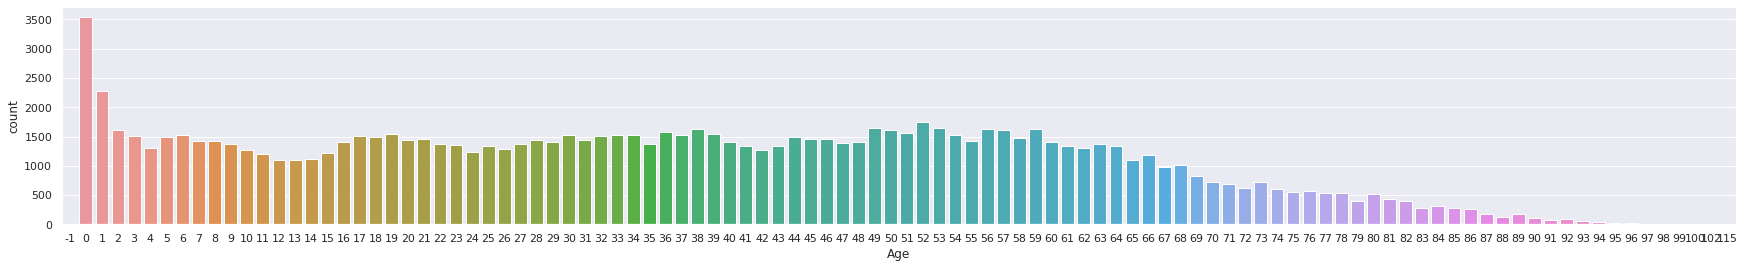

In [ ]:
# Getting a quick snapshot of the age distribution of the dataset

sns.set(rc={'figure.figsize':(30,4)})
sns.countplot(x="Age",data=df );



> It appears the ages from 2 to 68 have a fairly uniform representation in the data set. <br> This is going to be good for our analysis going forward





In [ ]:
#Confirming the number of unique values for each columns
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Handicap has 5 unique values which is unusal as per the original variable ranges given by the data collectors. The record is meant to only have 0 & 1. Investigating further

In [ ]:
# Checking the value ranges for handicap
df.Handcap.unique()

array([0, 1, 2, 3, 4])

In [ ]:
# Checking a sample of the unusual entry to verify if these are wrong entries or mistakes
df[df['Handcap'] == 4]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
91820,9.251878e+12,5789549,M,2016-06-08T15:14:00Z,2016-06-08T00:00:00Z,15,DA PENHA,0,0,0,0,4,0,No
98538,4.972463e+14,5760621,M,2016-06-01T15:11:25Z,2016-06-03T00:00:00Z,19,SÃO PEDRO,0,0,0,0,4,0,No
104268,7.581895e+14,5697136,F,2016-05-13T15:01:17Z,2016-06-02T00:00:00Z,9,ITARARÉ,0,0,0,0,4,1,Yes


Upon Further investigation, It appears the dataset has been updated to include a non-binary handicap scale. 

The current scale of 0-4 describes if a patient has between 0 to 4 total number of disabilities. <br> 0 - being no disability by brazilian law, 1 - being one type of disability(e.g blindness) and 4 - being four total disability count according to brazilian law( eg blindness, deafness, lameness and dumbness)

No further information is given by dataset creators.


### Data Cleaning
> There are no missing or duplicated values in the dataset, but there seems to be some unsual values in the data. E.g Age in the negatives or  ages above 100. This might not be errors because it's possible an age of -1 signifying a baby still in the womb and ages above 100, though uncommon are still possible. Further investigations will determine if these values will be useful .

 

In [ ]:
# Checking for entries with ages in the negatives
df[df['Age'] < 0]  

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


There's only one entry for ages < 0, so it's safe to drop it as it won't affect our analysis in any meaningful way

In [ ]:
# dropping entry for patient < 0
df = df.drop(99832)

In [ ]:
# Checking
df[df['Age'] < 0]  

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [ ]:
#Checking to make sure data is still intact

df.shape

(110526, 14)

Checking for entries above 98 years(I'am using this as an outlier age group)

In [ ]:
df[df['Age'] > 98] 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
79270,9.739430e+12,5747809,M,2016-05-30T16:21:56Z,2016-05-31T00:00:00Z,100,TABUAZEIRO,0,0,0,0,1,0,No
79272,9.739430e+12,5747808,M,2016-05-30T16:21:56Z,2016-05-31T00:00:00Z,100,TABUAZEIRO,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
92084,5.578313e+13,5670914,F,2016-05-06T14:55:36Z,2016-06-03T00:00:00Z,100,ANTÔNIO HONÓRIO,0,0,0,0,0,1,No
97647,3.661577e+10,5775674,F,2016-06-06T09:46:34Z,2016-06-06T00:00:00Z,99,SANTO ANTÔNIO,0,1,1,0,0,0,No


There's a significang number of people within this range, so we can keep the records for now

Since there are no wrong entries or duplicates in the data, i am just going to perform a bit of housekeeping, which will include



1.   Renaming the columns from Camelcases to underscore seperated cases for better readability and preference
2.   Change the ScheduledDay & AppointmentDay columns from string to Datetime
3.   Group the Ages into age-groups for our analysis
4.   Convert the No-show columns from yes/no to 0/1 to conform with other records and analysis
5.    Make a column to show the difference the time interval between the ScheduledDay & AppointmentDay of each entry.




In [ ]:
# 1. Renaming the columns from CamelCases to underscore seperated cases
def snake_case(cols):  
    return ''.join(['_'+i.lower() if i.isupper()
               else i for i in cols]).lstrip('_')

df.columns = df.columns.map(snake_case)

In [ ]:
df.columns

Index(['patient_id', 'appointment_i_d', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 's_m_s_received',
       'no-show'],
      dtype='object')

In [ ]:
# fixing columns appointment_i_d and s_m_s_received

df = df.rename(columns={'appointment_i_d': 'appointment_id' , 's_m_s_received': 'sms_received'})
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no-show'],
      dtype='object')

In [ ]:
# 2.Change the ScheduledDay & AppointmentDay columns from string to Datetime

df['scheduled_day']  = df['scheduled_day'].astype('datetime64')

df['scheduled_day'].head()

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: scheduled_day, dtype: datetime64[ns]

In [ ]:
df['appointment_day']  = df['appointment_day'].astype('datetime64')
df['appointment_day']

0        2016-04-29
1        2016-04-29
2        2016-04-29
3        2016-04-29
4        2016-04-29
            ...    
110522   2016-06-07
110523   2016-06-07
110524   2016-06-07
110525   2016-06-07
110526   2016-06-07
Name: appointment_day, Length: 110526, dtype: datetime64[ns]

In [ ]:
# 3. Grouping the Ages into age-groups for analysis

bin = [0,18,25,39,60,80,120]

df['age_group'] = pd.cut(x=df['age'], bins= bin, 
                         labels=['Pre-teen/Teen(0-18)', 'Young Adult(19-25)', 'Adult(26-39)',
                                 'Middle Aged(40-60)', 'Senior Citizen(61-80)','Elderly(81-120)'],
                         right=True)
df['age_group'].value_counts(normalize=True) * 100



Middle Aged(40-60)       29.426940
Pre-teen/Teen(0-18)      23.672970
Adult(26-39)             19.331321
Senior Citizen(61-80)    15.805659
Young Adult(19-25)        9.097367
Elderly(81-120)           2.665744
Name: age_group, dtype: float64

In [ ]:
# 4.Convert the No-show columns from yes/no to 0/1 to conform with other records
# Creating a column for 1 if patient shows up and 0 if they don't

df['show_up'] = df['no-show'].map(dict(Yes=0, No=1))

In [ ]:
#checking to see if the values match
df['no-show'].value_counts()

No     88207
Yes    22319
Name: no-show, dtype: int64

In [ ]:
df['show_up'].value_counts()

1    88207
0    22319
Name: show_up, dtype: int64

In [ ]:
# 5. Make a column to show the difference the time interval between the ScheduledDay & AppointmentDay of each entry

df['time_interval'] = (df['appointment_day'] - df['scheduled_day'])
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,age_group,show_up,time_interval
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Senior Citizen(61-80),1,-1 days +05:21:52
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Middle Aged(40-60),1,-1 days +07:51:33
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Senior Citizen(61-80),1,-1 days +07:40:56
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Pre-teen/Teen(0-18),1,-1 days +06:30:29
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Middle Aged(40-60),1,-1 days +07:52:37


There seems to be some negative time_intervals in the dataset which is unusual because appointments should only happen after schedule.

Investigating further

In [ ]:
# Chechking for all negative time_interval

df[df.time_interval < "0 days"]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,age_group,show_up,time_interval
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Senior Citizen(61-80),1,-1 days +05:21:52
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Middle Aged(40-60),1,-1 days +07:51:33
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Senior Citizen(61-80),1,-1 days +07:40:56
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Pre-teen/Teen(0-18),1,-1 days +06:30:29
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Middle Aged(40-60),1,-1 days +07:52:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110511,8.235996e+11,5786742,F,2016-06-08 08:50:20,2016-06-08,14,MARIA ORTIZ,0,0,0,0,0,0,No,Pre-teen/Teen(0-18),1,-1 days +15:09:40
110512,9.876246e+13,5786368,F,2016-06-08 08:20:01,2016-06-08,41,MARIA ORTIZ,0,0,0,0,0,0,No,Middle Aged(40-60),1,-1 days +15:39:59
110513,8.674778e+13,5785964,M,2016-06-08 07:52:55,2016-06-08,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,No,Pre-teen/Teen(0-18),1,-1 days +16:07:05
110514,2.695685e+12,5786567,F,2016-06-08 08:35:31,2016-06-08,58,MARIA ORTIZ,0,0,0,0,0,0,No,Middle Aged(40-60),1,-1 days +15:24:29


It seems because scheduled_day has the time of the day embeded in it while appointment_day does't, when the scheduled day and appointment day falls on the same day, pandas datetime method ....

Dropping the time aspect of the scheduled_day column to remove the descrepancy

In [ ]:
#dropping time section in scheduled_day

df['scheduled_day'] = df['scheduled_day'].dt.date

In [ ]:
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])

In [ ]:
# Rerunning time_interval
df['time_interval'] = (df['appointment_day'] - df['scheduled_day'])
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,age_group,show_up,time_interval
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Senior Citizen(61-80),1,0 days
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Middle Aged(40-60),1,0 days
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Senior Citizen(61-80),1,0 days
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Pre-teen/Teen(0-18),1,0 days
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Middle Aged(40-60),1,0 days


In [ ]:
# Chechking if there are still negative time_intervals left

df[df.time_interval < "0 days"]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,age_group,show_up,time_interval
27033,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,Adult(26-39),0,-1 days
55226,7.896294e+12,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,Young Adult(19-25),0,-1 days
64175,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,Young Adult(19-25),0,-1 days
71533,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,Elderly(81-120),0,-6 days
72362,3.787482e+12,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,Pre-teen/Teen(0-18),0,-1 days


There are still negative time_intervals but these seems to be errors in the dataset. 

In [ ]:
# Dropping rows with negative time_intervals
df = df.drop([27033,55226,64175,71533,72362])

In [ ]:
# General House-keeping
#Dropping the no-show column since the numerical show_up column has replaced it
df.drop(['no-show'], axis = 1, inplace=True)

In [ ]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,age_group,show_up,time_interval
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Senior Citizen(61-80),1,0 days
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Middle Aged(40-60),1,0 days
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Senior Citizen(61-80),1,0 days
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Pre-teen/Teen(0-18),1,0 days
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Middle Aged(40-60),1,0 days


In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1: How much does age play in whether a person will show up for their appointment

In [ ]:
# To explore the relative frequency(in Percentage) of Age_groups that show up for Appointments
#   
df.groupby("age_group")["show_up"].value_counts(normalize=True) * 100

age_group              show_up
Pre-teen/Teen(0-18)    1          77.465845
                       0          22.534155
Young Adult(19-25)     1          74.627479
                       0          25.372521
Adult(26-39)           1          77.747691
                       0          22.252309
Middle Aged(40-60)     1          81.285138
                       0          18.714862
Senior Citizen(61-80)  1          84.997043
                       0          15.002957
Elderly(81-120)        1          83.584707
                       0          16.415293
Name: show_up, dtype: float64

> It appears from the table above that that relatively **Young Adults** have the lower appointment show up rate than the age groups. <br>
To get a more clearer understanding of the relationship, i'll sort the values and also draw a plot of the frequencyy.  



In [ ]:
# Sorting the age groups by their relative show up
df.groupby("age_group")["show_up"].value_counts(normalize=True).sort_values(ascending=False)* 100

age_group              show_up
Senior Citizen(61-80)  1          84.997043
Elderly(81-120)        1          83.584707
Middle Aged(40-60)     1          81.285138
Adult(26-39)           1          77.747691
Pre-teen/Teen(0-18)    1          77.465845
Young Adult(19-25)     1          74.627479
                       0          25.372521
Pre-teen/Teen(0-18)    0          22.534155
Adult(26-39)           0          22.252309
Middle Aged(40-60)     0          18.714862
Elderly(81-120)        0          16.415293
Senior Citizen(61-80)  0          15.002957
Name: show_up, dtype: float64

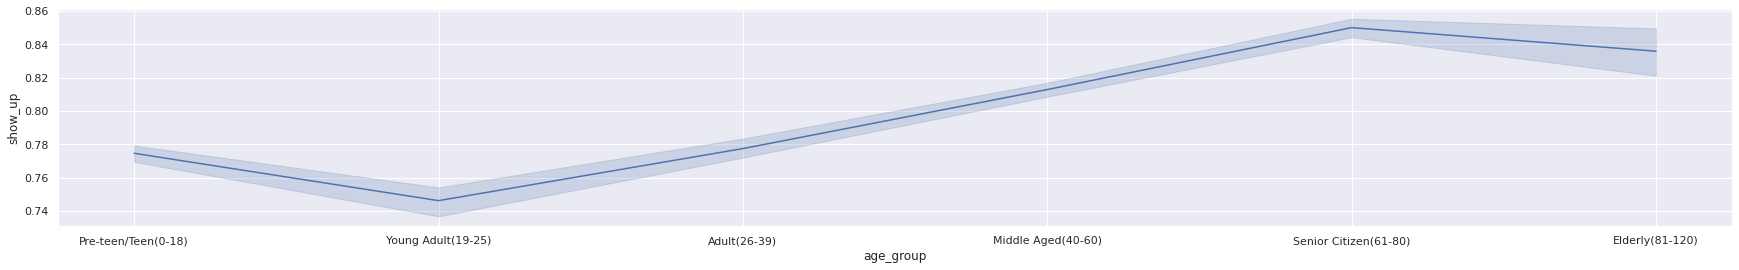

In [ ]:
# using seaborns lineplot to view this relationship

sns.lineplot(x ="age_group", y ="show_up",data = df);


> From the tables and graph above , it seems my original hypotesis of younger people prioritizing other things over their health pans out.
<br>
<br>
From the graph we can see a decline in showing up for doctors appiontment amongst young adults.  
<br>
We can also see a steady rise in average percentage of showing up for doctor's appointment from the age group of adulthood all the way senior citizens. This seems to fit with our hypotesis that as one grows older, we tend to take our health more seriously

It's possible that sms reminders played a major role in the discrepancy in the data, so I'm going to check how sms received was spread across the age groups.

In [ ]:
# Checking how sms was received across the age groups

df[df['sms_received'] == 1]['age_group'].value_counts(normalize=True).sort_values(ascending = False) *100

Middle Aged(40-60)       30.423594
Pre-teen/Teen(0-18)      21.836056
Adult(26-39)             20.159028
Senior Citizen(61-80)    15.619488
Young Adult(19-25)        9.851092
Elderly(81-120)           2.110742
Name: age_group, dtype: float64

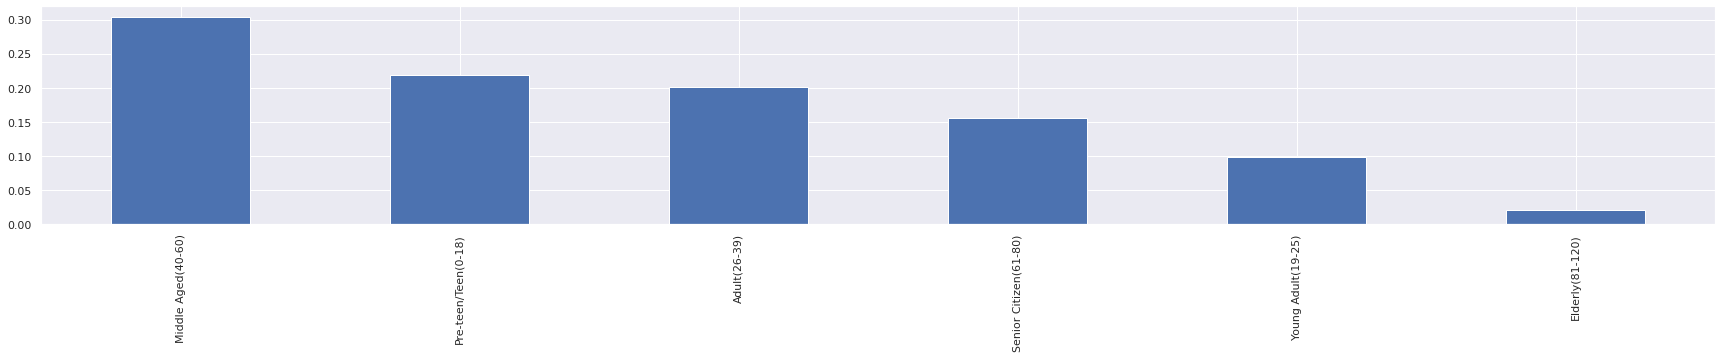

In [ ]:
# Plotting the distribution
df[df['sms_received'] == 1]['age_group'].value_counts(normalize=True).sort_values(ascending = False).plot(kind = 'bar');



From the table and graph above, it seems sms reminders might have played a role in people showing up for their doctors appointment since Young Adults have the lowest show up rate and also received less sms reminders on average as compared to other age groups except for the Elderly age group.
<br>
<br>
This effect **should also not** be overstated, because when we look through the data we find out that on average the "Middle Age" age group received twice as many sms reminders as compared to the the Senior citizen's age group yet has a lower show up rate as cpmpared to them. 
<br>
A deeper Analysis is required to actually asertain how significant a role sms reminders plays in people showing up for their doctors appointment within each age group.

### Research Question 2 : How much does the time difference between the date appointment was made and the actual date of the appointment play in whether a person will show up for their appointment

In [ ]:
# Getting the general statistical Overview of the time Interval between the Scheduled Date and the Appointment Date
df['time_interval'].describe()


count                        110521
mean     10 days 04:25:27.412889858
std      15 days 06:07:25.262183605
min                 0 days 00:00:00
25%                 0 days 00:00:00
50%                 4 days 00:00:00
75%                15 days 00:00:00
max               179 days 00:00:00
Name: time_interval, dtype: object

In [ ]:
df['time_interval'].mode()

0   0 days
dtype: timedelta64[ns]

It appears the average numbers of days(mean) between schedule day and appointment day is 10 days. This might be largely be due just a few entries that are very large.

Further Check will verify if this is indeed the case

In [ ]:
#checking for very large time difference between schedule and appointment days
#Choosing 150 days as an arbituarily large date difference
df[df['time_interval'] > '150 days']

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,age_group,show_up,time_interval
3764,8.322564e+14,5030230,F,2015-11-10,2016-05-04,51,RESISTÊNCIA,0,0,0,0,0,1,Middle Aged(40-60),1,176 days
27390,4.946135e+13,5139826,M,2015-12-08,2016-05-11,52,SANTA CECÍLIA,0,1,0,0,0,1,Middle Aged(40-60),0,155 days
27391,3.272966e+13,5140065,M,2015-12-08,2016-05-18,48,TABUAZEIRO,0,0,0,0,0,0,Middle Aged(40-60),1,162 days
27392,9.427578e+11,5140258,M,2015-12-08,2016-05-25,68,MARUÍPE,0,0,0,0,0,1,Senior Citizen(61-80),1,169 days
27393,4.173493e+13,5140262,F,2015-12-08,2016-05-25,56,SANTA CECÍLIA,0,1,0,0,0,1,Middle Aged(40-60),0,169 days
27554,7.415831e+12,5140133,F,2015-12-08,2016-05-18,78,SÃO CRISTÓVÃO,0,0,0,0,0,0,Senior Citizen(61-80),0,162 days
27565,1.787260e+14,5139864,M,2015-12-08,2016-05-11,83,SANTA CECÍLIA,0,1,0,0,1,1,Elderly(81-120),0,155 days
27566,7.924991e+12,5140125,M,2015-12-08,2016-05-18,49,SÃO CRISTÓVÃO,0,0,0,0,0,0,Middle Aged(40-60),1,162 days
27570,2.199426e+13,5139859,F,2015-12-08,2016-05-11,57,TABUAZEIRO,0,0,0,0,0,1,Middle Aged(40-60),1,155 days
27571,7.279665e+13,5140115,M,2015-12-08,2016-05-18,68,MARUÍPE,0,1,0,0,0,0,Senior Citizen(61-80),0,162 days


In [ ]:
df[df['time_interval'] > '150 days'].shape

(56, 16)

Large time difference between schedule and appointment date though not the norm doesn't seem to be out of the ordinary
<br>
<br>

Based of this we can break down our time_interval into chunks of series and compare if longer time intervals between schedule date and appointment date have any noticable effect on whether people show up for their appointments

In [ ]:
# Breaking down the days in to bitsize chunks

days_zero_to_avg = df[(df['time_interval'] >= '0 days') & (df['time_interval'] <= '10 days')]
days_avg_to_45 = df[(df['time_interval'] > '10 days') & (df['time_interval'] <= '45 days')]
days_45_to_90 = df[(df['time_interval'] > '45 days') & (df['time_interval'] <= '90 days')]
days_90_to_inf =df[(df['time_interval'] > '90 days')]

In [ ]:
# Computing and graphing the percentage of people who show up for their appointments
# if it is within 10 days of scheduling 
days_zero_to_avg.show_up.value_counts(normalize=True)*100


1    85.390733
0    14.609267
Name: show_up, dtype: float64

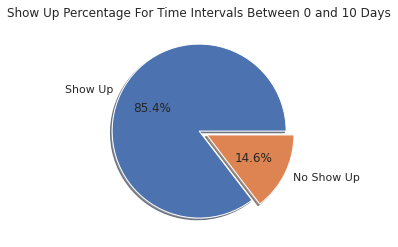

In [ ]:
sizes =days_zero_to_avg.show_up.value_counts(normalize=True)*100
labels = 'Show Up', 'No Show Up'
explode = (0, 0.1)
fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels = labels, explode = explode, shadow = True,autopct='%1.1f%%')
ax1.set_title("Show Up Percentage For Time Intervals Between 0 and 10 Days")
plt.show() 

In [ ]:
# Computing and graphing the percentage of people who show up for their appointments
# if it is within 11 days and 45 days of scheduling
days_avg_to_45.show_up.value_counts(normalize=True)*100

1    67.239067
0    32.760933
Name: show_up, dtype: float64

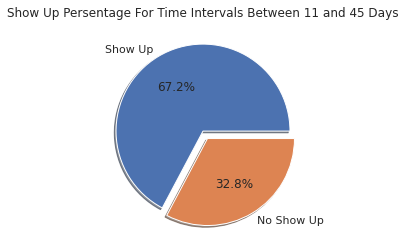

In [ ]:
sizes =days_avg_to_45.show_up.value_counts(normalize=True)*100
labels = 'Show Up', 'No Show Up'
explode = (0, 0.1)
fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels = labels, explode = explode, shadow = True,autopct='%1.1f%%')
ax1.set_title("Show Up Persentage For Time Intervals Between 11 and 45 Days")
plt.show() 

In [ ]:
# Computing and graphing the percentage of people who show up for their appointments
# if it is within 46 and 90 days of scheduling
days_45_to_90.show_up.value_counts(normalize=True)*100

1    69.146608
0    30.853392
Name: show_up, dtype: float64

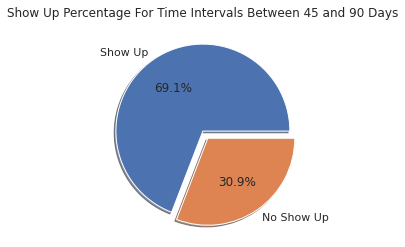

In [ ]:
sizes =days_45_to_90.show_up.value_counts(normalize=True)*100
labels = 'Show Up', 'No Show Up'
explode = (0, 0.1)
fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels = labels, explode = explode, shadow = True,autopct='%1.1f%%')
ax1.set_title("Show Up Percentage For Time Intervals Between 45 and 90 Days")
plt.show() 

In [ ]:
# Computing and graphing the percentage of people who show up for their appointments
# if it is above 90 days of scheduling
days_90_to_inf.show_up.value_counts(normalize=True)*100

1    74.193548
0    25.806452
Name: show_up, dtype: float64

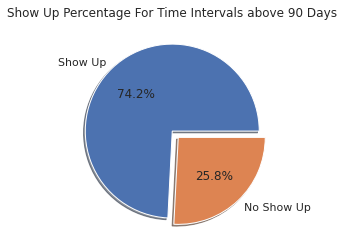

In [ ]:
sizes =days_90_to_inf.show_up.value_counts(normalize=True)*100
labels = 'Show Up', 'No Show Up'
explode = (0, 0.1)
fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels = labels, explode = explode, shadow = True,autopct='%1.1f%%')
ax1.set_title("Show Up Percentage For Time Intervals above 90 Days")
plt.show() 

> From the tables and charts above, **outside of the 10 days average** between schedule time and appointment time, there seems to be **no major impact** of wait time on whether an individual will show up for their doctors appointment or not.



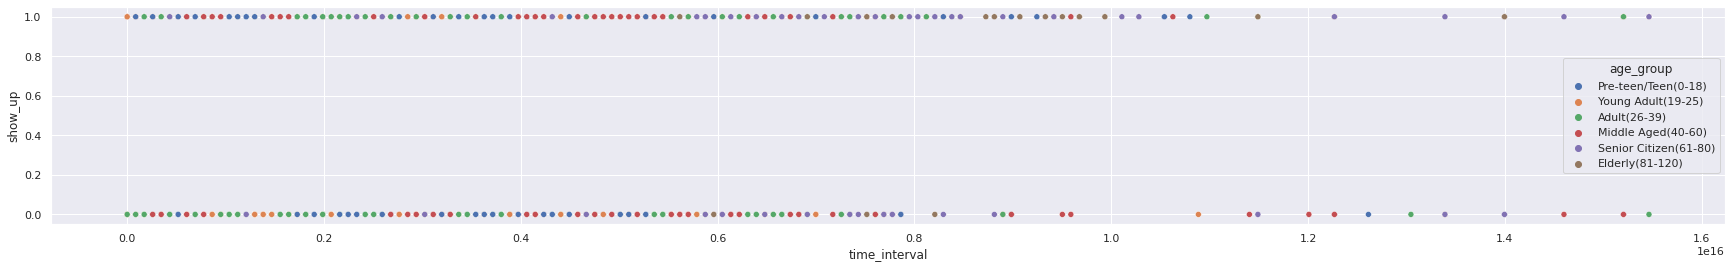

In [ ]:
sns.scatterplot(data=df, x="time_interval", y="show_up", hue="age_group");

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])